In [1]:
## import librerie

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
%matplotlib inline

In [3]:
'''
modify visualisations layout
'''
plt.rcParams['figure.figsize'] = [14, 7]

In [120]:
'''
redaing of the dataframe from a csv file
'''

BASE='https://proai-datasets.s3.eu-west-3.amazonaws.com/'
df= pd.read_csv(BASE+'aviation-accidents.csv')
df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [121]:
'''
acquiring information about the full dataframe
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [122]:
'''
number of NaN values for each variable
'''
df.isna().sum()

date               0
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year               0
dtype: int64

In [123]:
'''
Q1: General evolution of airplanes' incidents over time (from 1919-2023); annual granularity

    -> select: year
    -> calculate: frequency per year
'''
X= df['year']
X.head()

0    unknown
1    unknown
2    unknown
3    unknown
4    unknown
Name: year, dtype: object

In [112]:
'''
Checking years registerd on the dataframe
'''
X.unique()

array(['unknown', '1919', '1920', '1921', '1922', '1923', '1924', '1925',
       '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933',
       '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941',
       '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949',
       '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957',
       '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023'], dtype=object)

In [124]:
'''
Discard all the unknown values from the year series
'''
X= X.loc[X != 'unknown']
X=pd.to_datetime(X)
X.shape

(23906,)

In [126]:
'''
Frequency calculation for the rappresentation of the historical series
'''
X_freq=X.value_counts()
X_freq=dict(X_freq)
X_freq_sort= dict(sorted(X_freq.items()))
X_freq_sort

{Timestamp('1919-01-01 00:00:00'): 2,
 Timestamp('1920-01-01 00:00:00'): 4,
 Timestamp('1921-01-01 00:00:00'): 7,
 Timestamp('1922-01-01 00:00:00'): 3,
 Timestamp('1923-01-01 00:00:00'): 8,
 Timestamp('1924-01-01 00:00:00'): 3,
 Timestamp('1925-01-01 00:00:00'): 2,
 Timestamp('1926-01-01 00:00:00'): 4,
 Timestamp('1927-01-01 00:00:00'): 2,
 Timestamp('1928-01-01 00:00:00'): 14,
 Timestamp('1929-01-01 00:00:00'): 25,
 Timestamp('1930-01-01 00:00:00'): 31,
 Timestamp('1931-01-01 00:00:00'): 19,
 Timestamp('1932-01-01 00:00:00'): 14,
 Timestamp('1933-01-01 00:00:00'): 17,
 Timestamp('1934-01-01 00:00:00'): 25,
 Timestamp('1935-01-01 00:00:00'): 35,
 Timestamp('1936-01-01 00:00:00'): 50,
 Timestamp('1937-01-01 00:00:00'): 51,
 Timestamp('1938-01-01 00:00:00'): 71,
 Timestamp('1939-01-01 00:00:00'): 68,
 Timestamp('1940-01-01 00:00:00'): 318,
 Timestamp('1941-01-01 00:00:00'): 232,
 Timestamp('1942-01-01 00:00:00'): 389,
 Timestamp('1943-01-01 00:00:00'): 769,
 Timestamp('1944-01-01 00:00:0

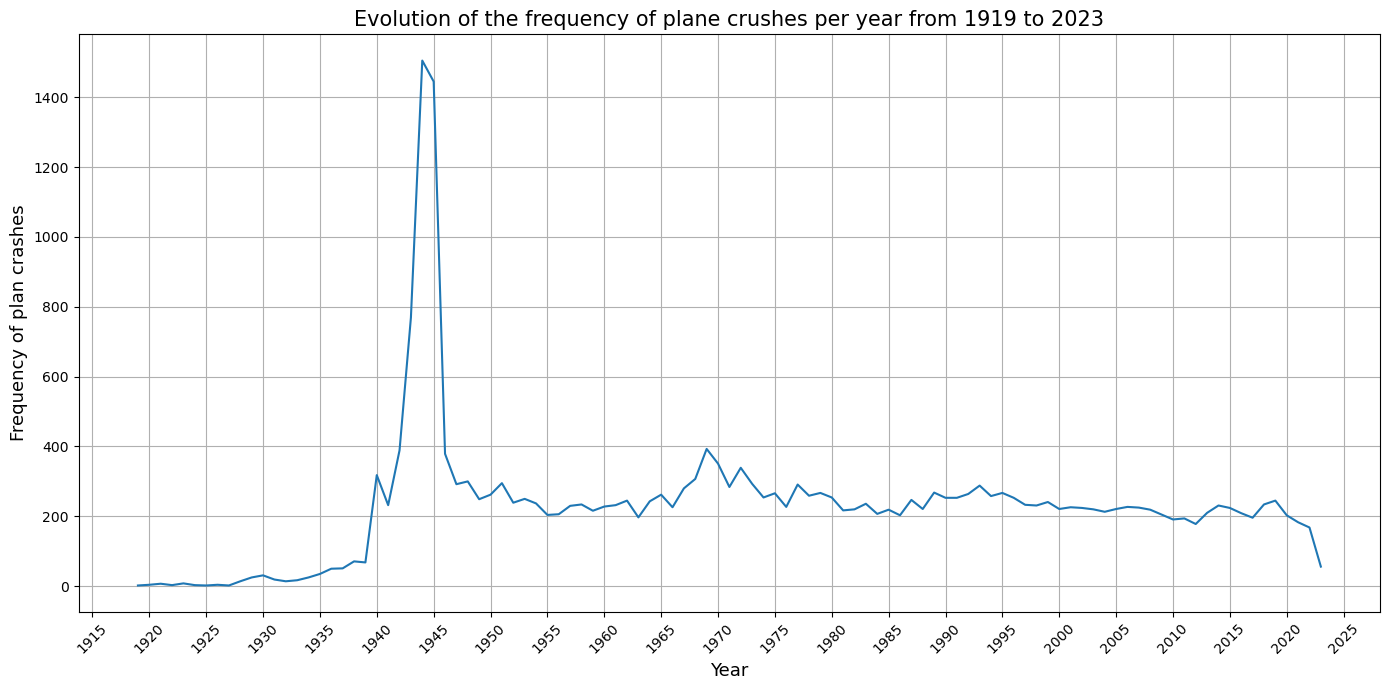

In [130]:
'''
Historical series visualization
'''
plt.plot(X_freq_sort.keys(), X_freq_sort.values())

plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
plt.xlabel('Year',fontsize=13)  
plt.ylabel('Frequency of plan crashes',fontsize=13)  
plt.title('Evolution of the frequency of plane crushes per year from 1919 to 2023',fontsize=15)

plt.xticks(rotation=45) 
plt.grid(True)

plt.tight_layout()  
plt.show()

In [13]:
'''
Q2: in which country plane crushes uccured most frequently?
'''

country= df['country']
country.shape

(23967,)

In [14]:
country.unique()

array(['Unknown country', 'Russia', 'Eritrea', 'Libya', 'Poland', '?',
       'India', 'Bulgaria', 'Bahamas', 'Zimbabwe', 'Mauritania', 'Cyprus',
       'Mexico', 'New Caledonia', 'Honduras', 'Peru', 'Kenya',
       'Antarctica', 'Latvia', 'Yemen', 'Ukraine', 'France', 'Liberia',
       'Italy', 'U.K.', 'South Africa', 'Sudan', 'Sweden', 'Cuba',
       'Belgium', 'China', 'Atlantic Ocean', 'Netherlands', 'Germany',
       'USA', 'Iran', 'Chile', 'Israel', 'Argentina', 'P.N. Guinea',
       'Nicaragua', 'Czech Rep.', 'Dominican Rep.', 'Brazil',
       'Mediterranean Sea', 'Indonesia', 'Egypt', 'Bolivia', 'Spain',
       'Australia', 'Iraq', 'Guatemala', 'Malta', 'Colombia',
       'Switzerland', 'Austria', 'Uganda', 'Trinidad & Tobago', 'Norway',
       'Greece', 'Algeria', 'Pakistan', 'Panama', 'Romania', 'Morocco',
       'Pacific Ocean', 'Hungary', 'Jamaica', 'Japan', 'Canada', 'Gambia',
       'Thailand', 'Philippines', 'Ecuador', 'Puerto Rico', 'Venezuela',
       'Mozambique', 'Si

In [154]:
country= country.loc[country != 'Unknown country']
country= country.loc[country != '?']
country.loc[country == 'Saint BarthÃ©lemy']= 'Saint Barthélemy'

X_country=dict(country.value_counts())
X_country=[[key,value]for key,value in X_country.items()]
columns=['country','total crushes']
df=pd.DataFrame(X_country,columns=columns)
df.head()

,country,total crushes
0,USA,4377
1,Russia,1422
2,U.K.,837
3,Canada,826
4,India,700


In [142]:
pip install geopandas matplotlib

     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     --------------- ---------------------- 20.5/51.5 kB 330.3 kB/s eta 0:00:01
     -------------------------------------  51.2/51.5 kB 440.4 kB/s eta 0:00:01
     -------------------------------------- 51.5/51.5 kB 378.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.1 MB 1.9 MB/s eta 0:00:01
   -------- ------------------------------- 0.2/1.1 MB 2.8 MB/s eta 0:00:01
   ------------- -------------------------- 0.4/1.1 MB 3.3 MB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.1 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
    --------------------------------------- 0.5/22.9 MB 27.5 MB/s eta 0:00:01
   -- ---------

In [157]:
import geopandas as gpd
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

C:\Users\bonom\AppData\Local\Temp\ipykernel_4428\1704712015.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [158]:
world.shape

(177, 6)

In [159]:
world['name'].unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

In [160]:
world['name']=world['name'].replace('United States of America','USA')
world['name']=world['name'].replace('United Kingdom','U.K.')
world['name'].unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada', 'USA', 'Kazakhstan',
       'Uzbekistan', 'Papua New Guinea', 'Indonesia', 'Argentina',
       'Chile', 'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad',
       'Haiti', 'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.',
       'Norway', 'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'Mozambique',
       'eSwatini

In [161]:
gdf=gpd.GeoDataFrame(df)

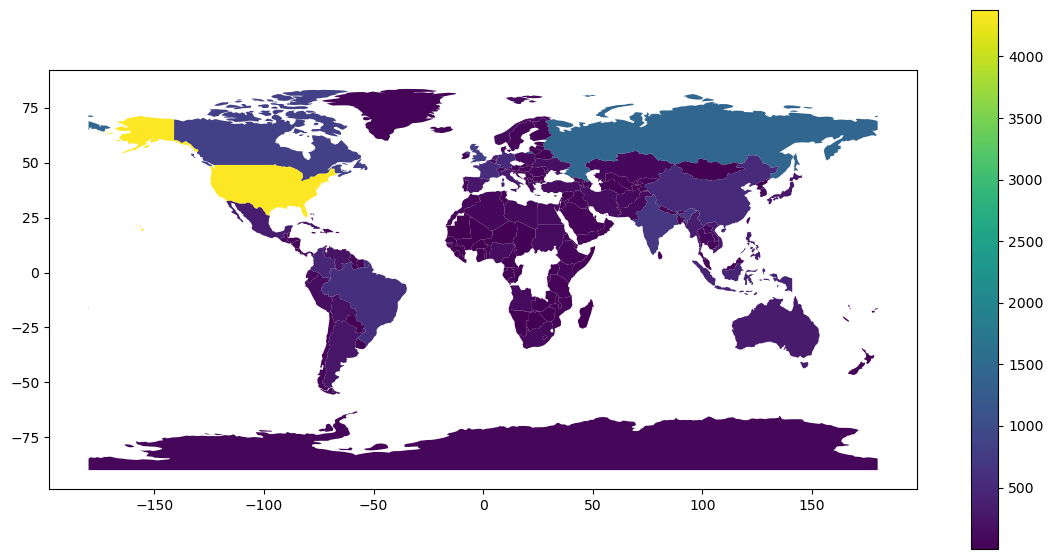

In [163]:
merged = world.merge(gdf,left_on='name',right_on='country')
merged.plot(column='total crushes', legend=True)
plt.show()

In [105]:
'''
Q3:Considering the country with the highest number of incidents reported (USA), which operators are responsible of the interestied incidents?
'''
BASE='https://proai-datasets.s3.eu-west-3.amazonaws.com/'
df= pd.read_csv(BASE+'aviation-accidents.csv')
df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [171]:
USA_df=df[['country','operator']]
USA_df=USA_df.loc[USA_df['country']=='USA']
USA_df.shape

(4377, 2)

In [183]:
operators_count=dict(USA_df['operator'].value_counts())
operators_count

{'USAF': 439,
 'USAAF': 383,
 'US Navy': 328,
 'American Airlines': 99,
 'United Airlines': 89,
 'TWA': 80,
 'Eastern Air Lines': 70,
 'private': 68,
 'Delta Air Lines': 53,
 'Continental Air Lines': 34,
 'Private': 29,
 'Northwest Airlines': 27,
 'Southwest Airlines': 26,
 'National Airlines': 22,
 'Northwest Orient Airlines': 22,
 'USMC': 21,
 'Pan Am': 20,
 'Unknown': 18,
 'FAA': 17,
 'FedEx': 17,
 'Alaska Airlines': 16,
 'Zantop': 16,
 'Cessna Aircraft': 16,
 'Ameriflight': 15,
 'Piedmont Airlines': 15,
 'US Coast Guard': 13,
 'US Army': 13,
 'Air National Guard': 13,
 'Allegheny Airlines': 13,
 'Braniff Airways': 13,
 'Martinaire': 13,
 'Western Air Lines': 12,
 'Cubana': 12,
 'Capital Airlines': 12,
 'USAir': 11,
 'Frontier Airlines': 11,
 'Alpine Aviation': 11,
 'Slick Airways': 10,
 'Grant Aviation': 10,
 'Reeve Aleutian Airways': 9,
 'NetJets': 9,
 'Hawkins & Powers': 9,
 'UPS': 9,
 'Northeast Airlines': 9,
 'Universal Airlines': 9,
 'PSA': 9,
 'US Airways': 8,
 'Delta Connect

In [4]:
'''
top 10 operatori che fanno incidenti in USA
'''
categories=list(operators_count.keys())
values=list(operators_count.values())

sns.set(style="whitegrid")

# Crea il diagramma a barre con Seaborn
bar_plot = sns.barplot(x=categories[:10], y=values[:10], palette='viridis')

# Aggiungi titolo e label agli assi
bar_plot.set_title('Number of Incidents per Operator', fontsize=16)
bar_plot.set_xlabel('Operator', fontsize=14)
bar_plot.set_ylabel('Number of Incidents', fontsize=14)

# Aggiungi etichette sopra le barre
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points',
                      fontsize=12)

# Migliora l'aspetto del grafico
sns.despine(left=True)
bar_plot.grid(True, axis='y', linestyle='--', alpha=0.7)

# Rotazione delle etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45, ha='right')

# Mostra il grafico
plt.tight_layout()
plt.show()

NameError: name 'operators_count' is not defined

In [280]:
fatal_df=df[['operator','fatalities','country']]
categories_top10=categories[:10]
fatal_df=fatal_df[fatal_df['operator'].isin(categories_top10)]
fatal_df.head()

,operator,fatalities,country
41,USAAF,NaN,Unknown country
166,TWA,0,USA
168,TWA,8,USA
180,TWA,0,USA
184,TWA,1,USA


In [271]:
fatal_df['country'].unique()

array(['Unknown country', 'USA', 'Guatemala', 'P.N. Guinea',
       'Atlantic Ocean', 'Panama', 'Iceland', 'Canada', 'Ecuador',
       'Pacific Ocean', 'Australia', 'Sierra Leone', 'Saint Lucia',
       'Mexico', 'U.S. M.O. Islands', 'Jamaica', 'Brazil',
       'Trinidad & Tobago', 'Vanuatu', 'U.K.', 'Bahamas', 'Puerto Rico',
       'New Caledonia', 'Greenland', 'French Polynesia', 'Spain',
       'Morocco', 'Gibraltar', 'Mediterranean Sea', 'Algeria', 'India',
       'Bermuda', 'Kiribati', 'Ghana', 'Egypt', 'Myanmar', 'China',
       'Sudan', 'Solomon Isl.', 'Suriname', 'Pakistan', 'Liberia',
       'St. Helena', 'Nigeria', 'Italy', 'Oman', 'New Zealand', 'France',
       'Tunisia', 'Albania', 'Ireland', 'Guyana', 'Netherlands',
       'Belgium', 'Bahrain', 'Indonesia', 'Germany', 'Bangladesh',
       'Palau', 'Fiji', 'Sweden', 'Philippines', 'Micronesia', 'Libya',
       'Croatia', 'Marshall Isl.', 'Yemen', 'Guam', 'Luxembourg',
       'Senegal', 'Gambia', 'Serbia', 'Bhutan', 'Iran',

In [281]:
fatal_df=fatal_df.loc[fatal_df['country']=='USA']
fatal_df.head()

,operator,fatalities,country
166,TWA,0,USA
168,TWA,8,USA
180,TWA,0,USA
184,TWA,1,USA
198,TWA,2,USA


In [282]:
fatal_df['fatalities'].info()

<class 'pandas.core.series.Series'>
Index: 1643 entries, 166 to 23892
Series name: fatalities
Non-Null Count  Dtype 
--------------  ----- 
1283 non-null   object
dtypes: object(1)
memory usage: 25.7+ KB


In [283]:
fatal_df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')

In [284]:
fatal_df['fatalities'].isna().sum()

392

In [285]:
fatal_df['fatalities'] = fatal_df['fatalities'].fillna(0).astype(int)

In [286]:
fatal_df['fatalities'].isna().sum()

0

In [289]:
fatal_df=fatal_df.drop('country',axis=1)

In [290]:
fatal_grouped=fatal_df.groupby(['operator']).sum()
fatal_grouped

,fatalities
operator,
American Airlines,499
Continental Air Lines,86
Delta Air Lines,152
Eastern Air Lines,740
TWA,793
US Navy,1131
USAAF,892
USAF,1981
United Airlines,943


<Axes: xlabel='operator'>

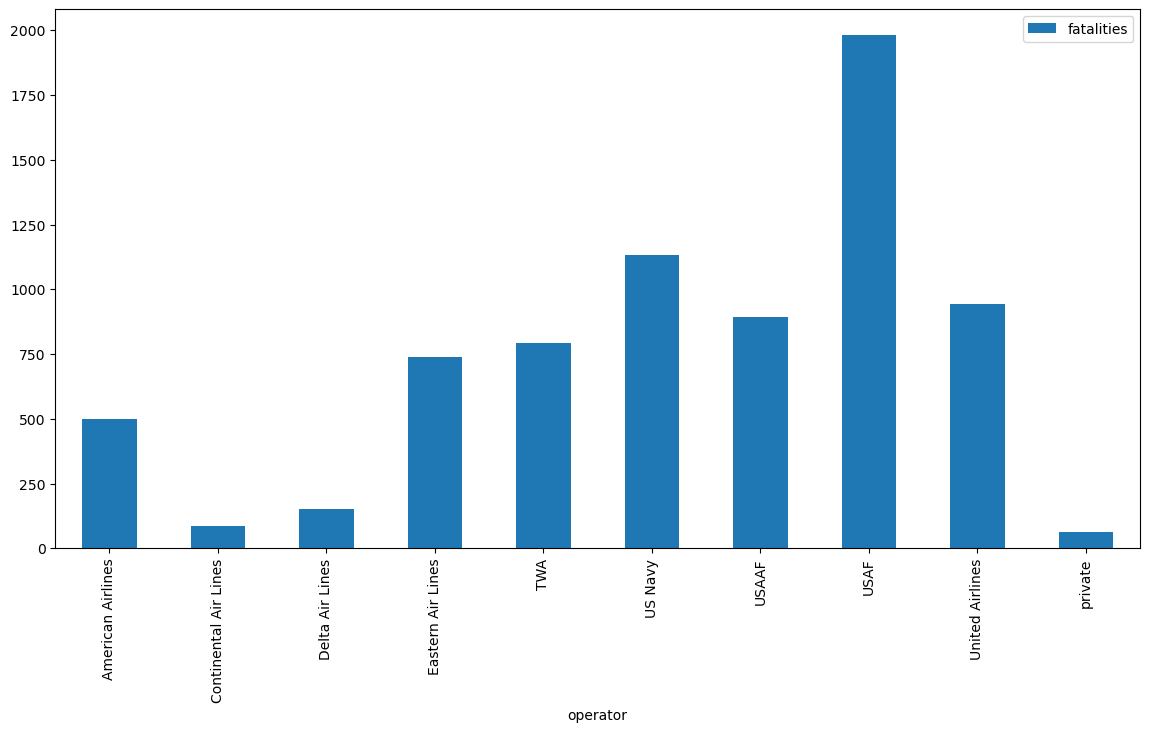

In [292]:
fatal_grouped.plot(kind="bar", y='fatalities')

In [89]:
'''
qA: which is the type of usaf plain that is causing more fatlities?
'''
usaf_type= df[['type','operator','fatalities']].loc[df['operator']=='USAF']
usaf_type.head()

,type,operator,fatalities
5740,Douglas C-47A (DC-3),USAF,3+ 1
5761,Douglas C-54D (DC-4),USAF,14
5764,Curtiss C-46D,USAF,2
5767,OA-10A Canso A (PBY-5A),USAF,0
5771,Douglas C-47D (DC-3),USAF,NaN


In [90]:
usaf_type=usaf_type.dropna()

In [91]:
usaf_type['fatalities']= pd.to_numeric(usaf_type['fatalities'], errors='coerce')
usaf_type= usaf_type.drop('operator',axis=1)
usaf_grouped= usaf_type.groupby(['type']).sum()
usaf_grouped

,fatalities
type,
Beech 1900C,5.0
Beech C-12A Huron,5.0
Beech C-12F Huron,8.0
Beech MC-12W Liberty,4.0
Beech T-1A Jayhawk,0.0
...,...
OA-10A Canso A (PBY-5A),0.0
PZL-Mielec C-145A (M28-05) Skytruck,0.0
Shorts JC-23A Sherpa (330),3.0


In [95]:
sorted_usaf= usaf_grouped.sort_values(by='fatalities', ascending=False)
sorted_usaf

,fatalities
type,
Douglas C-124A Globemaster II,406.0
Lockheed C-130E Hercules,303.0
Boeing KC-135A,287.0
Lockheed C-130B Hercules,263.0
Douglas C-47A (DC-3),250.0
...,...
Lockheed C-130H2 Hercules,0.0
Lockheed C-130H3 Hercules,0.0
Boeing RC-135V Rivet Joint,0.0


In [114]:
'''
Q5: Which is the operator that has coused more fatalities and which type of plain in particular?
'''
most_fatal=df[['type','fatalities']]
most_fatal.head()

,type,fatalities
0,Antonov An-12B,NaN
1,Antonov An-12B,NaN
2,Antonov An-12B,NaN
3,Antonov An-12BK,NaN
4,Antonov An-12BP,0


In [115]:
most_fatal=most_fatal.dropna()

In [116]:
most_fatal['fatalities']= pd.to_numeric(most_fatal['fatalities'], errors='coerce')

In [117]:
grouped_most_fatal= most_fatal.groupby(['type']).sum()
sorted_grouped= grouped_most_fatal.sort_values(by='fatalities', ascending=False)
sorted_grouped.head()

,fatalities
type,
Douglas C-47A (DC-3),5689.0
Douglas C-47 (DC-3),2619.0
Douglas C-47B (DC-3),1994.0
Tupolev Tu-154M,1395.0
Ilyushin Il-18V,1356.0


In [62]:
'''
Q5: Which are the safest operators in the world?
'''
oper_df=df[['operator','fatalities']]
oper_df.head()

,operator,fatalities
0,Indonesian AF,NaN
1,Indonesian AF,NaN
2,Indonesian AF,NaN
3,Soviet AF,NaN
4,Soviet AF,0


In [63]:
oper_df=oper_df.dropna()
oper_df.head()

,operator,fatalities
4,Soviet AF,0
7,Aeroflot,0
8,Russian AF,0
9,Soviet AF,0
10,Russian AF,0


In [64]:
oper_df.isna().sum()

operator      0
fatalities    0
dtype: int64

In [65]:
'''
pulisco le stringhe 'operator' e trasformo 'fatalities' in float
'''
import unicodedata

def normalize_unicode(text):
    # Normalizza la stringa in Unicode Form KD (compatibilità di decomposizione)
    text = unicodedata.normalize('NFKD', text)
    # Rimuove i caratteri non ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')
    return text

oper_df['operator'] = oper_df['operator'].apply(normalize_unicode)
oper_df['fatalities']= pd.to_numeric(oper_df['fatalities'], errors='coerce')

In [70]:
grouped_oper=oper_df.groupby(['operator']).sum()
grouped_oper

,fatalities
operator,
", op.for GoJump",1.0
", op.for Tlaxcala State Government",2.0
", op.for UN",0.0
1982-047 LLC,0.0
2M Leasing,0.0
...,...
easyJet Switzerland,0.0
flydubai,62.0
interCaribbean Airways,0.0


In [77]:
sorted_oper= grouped_oper.sort_values(by='fatalities', ascending=True)
top5_oper=sorted_oper.head(5)
print(top5_oper)

                     fatalities
operator                       
Dewberry Air                0.0
Skydive Twin Cities         0.0
Skydive Toronto             0.0
Skydive Teuge               0.0
Skydive San Marcos          0.0


In [2]:
pip install python-docx

   ---------------------------------------- 0.0/244.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/244.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/244.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/244.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/244.3 kB 330.3 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/244.3 kB 656.4 kB/s eta 0:00:01
   -------------------------------------- - 235.5/244.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 244.3/244.3 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#operator with the highest fatalities in general + comparison with the fatal. of the operator that has caused the most of them in USA (territory with more registered accidents)

In [ ]:
#geographical distribution of the fatalities of this operator 

In [ ]:
#which operator is the safest and with which type of plane